# Pneumonia Model load and Testing

## Importing libraries and images

In [1]:
tf.get_logger().setLevel('ERROR')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import matplotlib.pyplot as plt

### Importing two images:
- **'NORMAL-283245-0001.jpeg'** : Representative of normal lungs
- **'BACTERIA-40699-0001.jpeg'** : Representative of pneumonia infested lungs

We import the images with the keras image library and resize them to 150x150

In [3]:
filename_normal = 'NORMAL-283245-0001.jpeg'
filename_Pne = 'BACTERIA-40699-0001.jpeg' 
size = (150,150)

In [4]:
test_image_norm = image.load_img(filename_normal , target_size = size)
test_image_pne = image.load_img(filename_Pne , target_size = size)

**Looking at the images we can see the difference between the lungs.** 

(-0.5, 149.5, 149.5, -0.5)

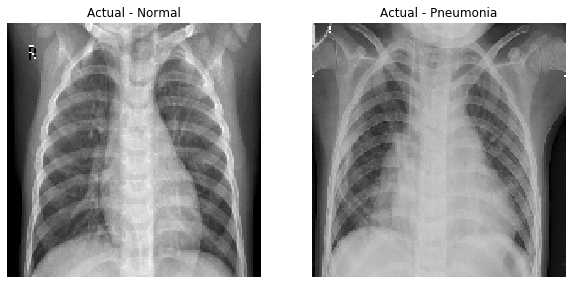

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(test_image_norm)
plt.title('Actual - Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(test_image_pne)
plt.title('Actual - Pneumonia')
plt.axis('off')

### Creating a tester class 

**The Pneumonia_test class will:**
1. Load the model.
2. Convert the image to an array format.
3. Adjust the dimensions.
4. Use the loaded model to give a prediction.

*Methods:*
- The pred method will return the prediction.
- The show_img method will return the image passed to the class for future reference.

This class can help test multiple images in the future.

In [13]:
class Pneumonia_test:
    def __init__(self, image):
        self.model =  tf.keras.models.load_model('pneumonia_model.h5')
        self.image = image
        print('Image size:', self.image.size)
        #Image to Array
        test_array = img_to_array(self.image)
        test_array = np.expand_dims(test_array, axis=0)
        #Output prediction
        self.result = self.model.predict(test_array)
    
    def pred(self):
        if self.result[0][0] == 1:
          prediction = 'PNEUMONIA'
        else:
          prediction = 'NORMAL'
        return prediction
    
    def show_img(self):
        return self.image

### Creating instances with our images

In [8]:
norm = Pneumonia_test(test_image_norm)
pne = Pneumonia_test(test_image_pne)

Image size: (150, 150)
Image size: (150, 150)


### Displaying images along with it's prediction

(-0.5, 149.5, 149.5, -0.5)

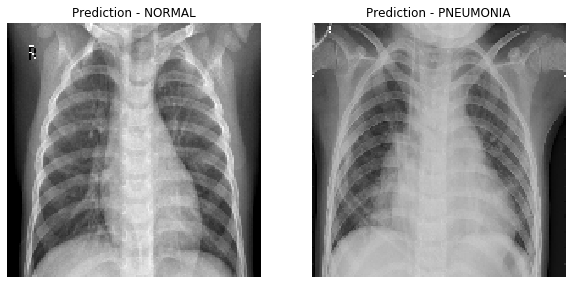

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(norm.show_img())
plt.title('Prediction - '+norm.pred())
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pne.show_img())
plt.title('Prediction - '+pne.pred())
plt.axis('off')

**We see that the model has correctly classified the images**